In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Replace 'data_file.data' with the path to your data file
input_file = r"C:\Users\5520\Downloads\Census Income Data Set(1)\Census Income Data Set\adult.data"

# Read the data into a DataFrame (assuming it's in a tabular format)
df = pd.read_csv(input_file, delimiter=',')  # Replace '\t' with the actual delimiter


df.columns = ['age', 'employment_type', 'final_weight', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

df

,age,employment_type,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [2]:
# Replace " ?" with NaN for easier handling
df.replace(" ?", pd.NA, inplace=True)

# Find the mode of each categorical column
categorical_columns = ['employment_type', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']

# Loop through each categorical column and replace missing values with the mode
for col in categorical_columns:
    mode_value = df[col].mode()[0]  # Get the mode (most frequent value)
    df[col].fillna(mode_value, inplace=True)
    
# Find the mean of each numerical column
numerical_columns = ['age', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']

# Loop through each numerical column and replace missing values with the mean
for col in numerical_columns:
    mean_value = df[col].mean()
    df[col].fillna(mean_value, inplace=True)

df

,age,employment_type,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
df = df.drop(columns=['relationship'])

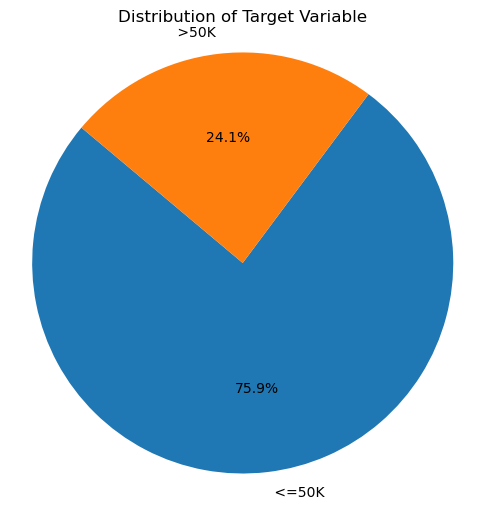

In [4]:

# Assuming 'target' is the name of your categorical target variable column in 'df'
# Count the occurrences of each class in the target variable
class_counts = df['income'].value_counts()

# Extract class labels and their corresponding counts
target_variable = class_counts.index.tolist()
class_counts = class_counts.tolist()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(class_counts, labels=target_variable, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Target Variable')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the pie chart
plt.show()


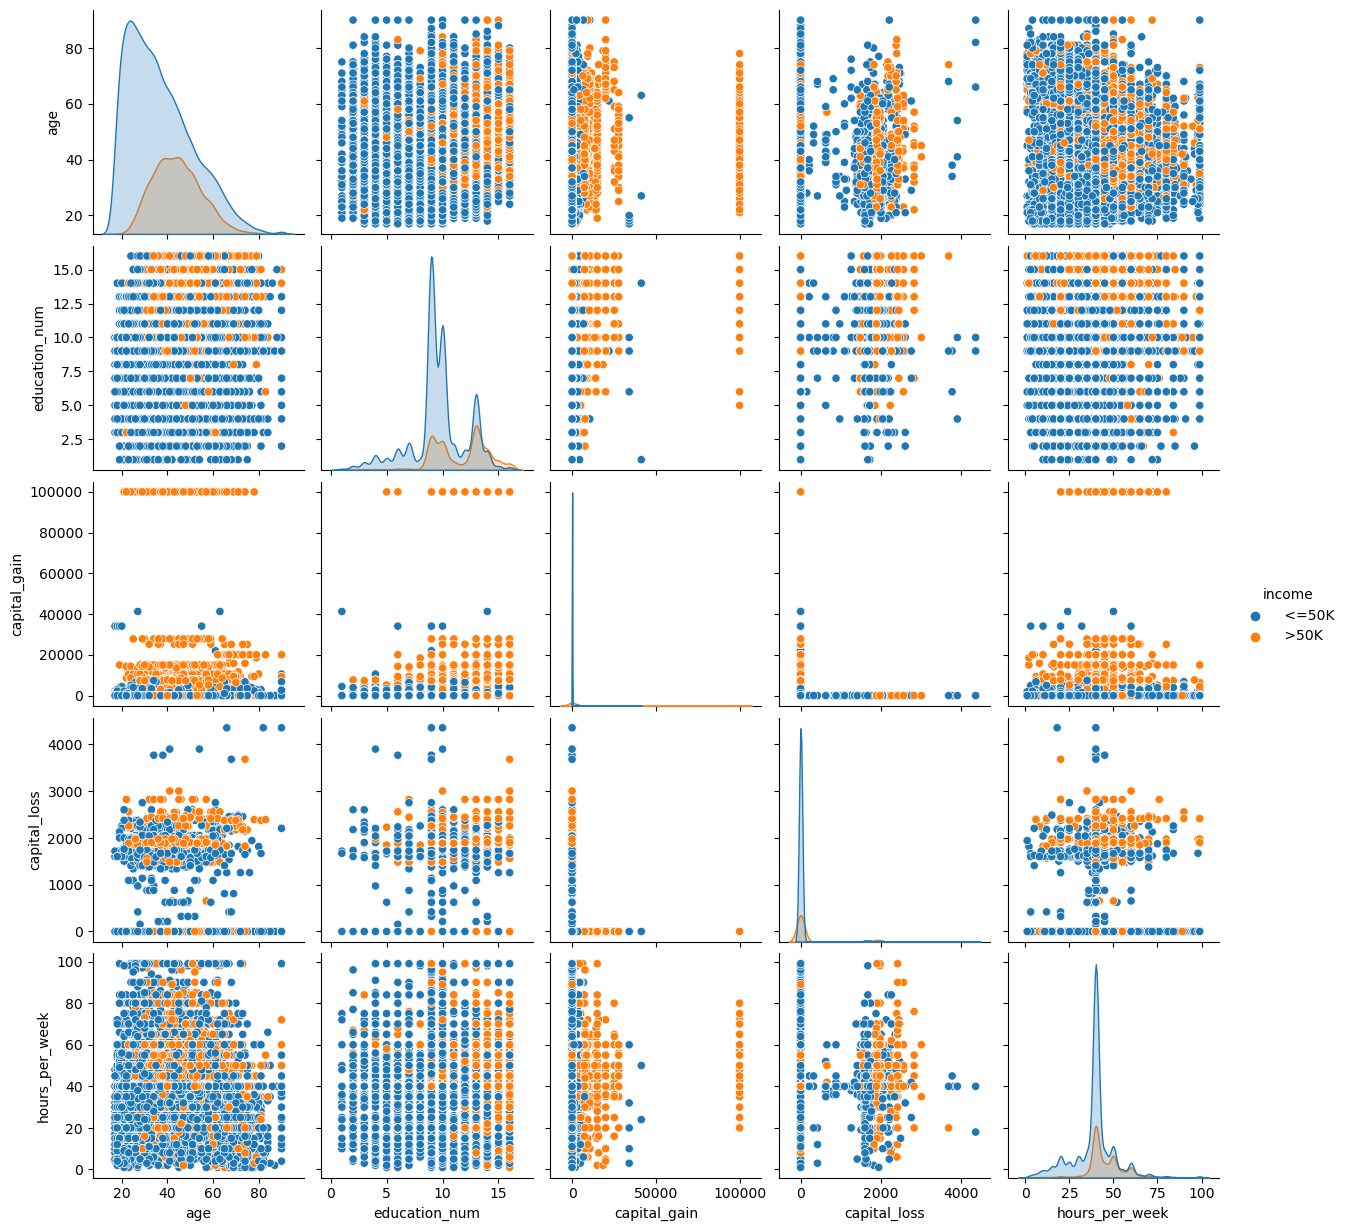

In [5]:
sns.pairplot(df, vars=['age', 'education_num', 'capital_gain','capital_loss', 'hours_per_week'], hue='income')
plt.show()

#This plot displays pairwise relationships between multiple numerical variables. 
#to see how different numerical features correlate with each other.

In [6]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['income_encoded'] = label_encoder.fit_transform(df['income'])
df

,age,employment_type,final_weight,education,education_num,marital_status,occupation,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,income_encoded
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,White,Male,0,0,13,United-States,<=50K,0
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,White,Male,0,0,40,United-States,<=50K,0
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Black,Male,0,0,40,United-States,<=50K,0
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Black,Female,0,0,40,Cuba,<=50K,0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,White,Female,0,0,40,United-States,<=50K,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,White,Female,0,0,38,United-States,<=50K,0
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,White,Male,0,0,40,United-States,>50K,1
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,White,Female,0,0,40,United-States,<=50K,0
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,White,Male,0,0,20,United-States,<=50K,0


In [7]:
df.drop(['income'], axis=1, inplace=True)

In [8]:
education_categories = {
    'High School': [' HS-grad', ' 11th', ' 9th', ' 7th-8th', ' 10th', ' 12th'],
    'Associate': [' Assoc-acdm', ' Assoc-voc'],
    'Bachelor': [' Bachelors', ' Some-college'],
    'Master': [' Masters'],
    'Doctorate': [' Doctorate', ' Prof-school'],
    'Below High School': [' 5th-6th', ' 1st-4th', ' Preschool'],
}

In [9]:
def categorize_education(edu):
    for category, levels in education_categories.items():
        if edu.strip() in [level.strip() for level in levels]:
            return category
    return 'Other'

df['education_category'] = df['education'].apply(categorize_education)

In [10]:
# Create a new column 'interaction' representing the interaction between 'education_category' and 'sex'
df['sex_interaction_with_education'] = df['education_category'] + '_' + df['sex'].str.strip()


In [11]:
import category_encoders as ce
from sklearn.ensemble import RandomForestClassifier

# Assuming 'income' is the target variable
X = df.drop('income_encoded', axis=1)
y = df['income_encoded']


In [12]:
# Create a target encoder instance for the categorical features you want to encode
encoder = ce.TargetEncoder(cols=['employment_type', 'education', 'marital_status', 'occupation', 'race', 'sex', 'native_country', 'education_category', 'sex_interaction_with_education'])

# Fit and transform the data, encoding the specified columns using the target variable
X_encoded = encoder.fit_transform(X, y)

# Create and train the Random Forest Classifier
model = RandomForestClassifier()
model.fit(X_encoded, y)

# Get feature importances
feature_importances = pd.Series(model.feature_importances_, index=X_encoded.columns).sort_values(ascending=False)
print(feature_importances)

final_weight                      0.175707
age                               0.157537
marital_status                    0.142083
capital_gain                      0.108184
hours_per_week                    0.082532
occupation                        0.076659
education_num                     0.045122
education                         0.043144
sex_interaction_with_education    0.042599
employment_type                   0.035193
capital_loss                      0.032032
education_category                0.017313
native_country                    0.016485
race                              0.015290
sex                               0.010118
dtype: float64


In [13]:
bin_edges = [0, 20, 40, 60, 80, float('inf')]
bin_labels = ['<20', '20-40', '40-60', '60-80', '80+']
df['hours_per_week_category'] = pd.cut(df['hours_per_week'], bins=bin_edges, labels=bin_labels, right=False)

In [14]:
#Create a new feature that combines 'employment_type' and 'hours_per_week_category'
df['hours_interaction_type'] = df['employment_type'].astype(str) + "_" + df['hours_per_week_category'].astype(str)


In [15]:
import category_encoders as ce
from sklearn.ensemble import RandomForestClassifier

# Assuming 'income' is the target variable
X = df.drop('income_encoded', axis=1)
y = df['income_encoded']

# Create a target encoder instance for the categorical features you want to encode
encoder = ce.TargetEncoder(cols=['employment_type', 'education', 'marital_status', 'occupation', 'race', 'sex', 'native_country', 'education_category', 'sex_interaction_with_education','hours_per_week_category', 'hours_interaction_type'])

# Fit and transform the data, encoding the specified columns using the target variable
X_encoded = encoder.fit_transform(X, y)

# Create and train the Random Forest Classifier
model = RandomForestClassifier()
model.fit(X_encoded, y)

# Get feature importances
feature_importances = pd.Series(model.feature_importances_, index=X_encoded.columns).sort_values(ascending=False)
print(feature_importances)

final_weight                      0.170462
age                               0.151346
marital_status                    0.143761
capital_gain                      0.113540
occupation                        0.072675
hours_per_week                    0.063692
education                         0.046688
sex_interaction_with_education    0.043995
education_num                     0.041502
hours_interaction_type            0.031687
capital_loss                      0.031341
employment_type                   0.021297
education_category                0.017057
native_country                    0.015851
race                              0.015281
hours_per_week_category           0.010159
sex                               0.009668
dtype: float64


In [16]:
def categorize_education(edu):
    for category, levels in education_categories.items():
        if edu.strip() in [level.strip() for level in levels]:
            return category
    return 'Other'

df['education_category'] = df['education'].apply(categorize_education)


In [17]:
# Create a new column 'interaction' representing the interaction between 'education_category' and 'sex'
df['native_country_interaction_with_education'] = df['education_category'] + '_' + df['native_country'].str.strip()

In [18]:
import category_encoders as ce
from sklearn.ensemble import RandomForestClassifier

# Assuming 'income' is the target variable
X = df.drop('income_encoded', axis=1)
y = df['income_encoded']

# Create a target encoder instance for the categorical features you want to encode
encoder = ce.TargetEncoder(cols=['employment_type', 'education', 'marital_status', 'occupation', 'race', 'sex', 'native_country', 'education_category', 'sex_interaction_with_education','hours_per_week_category', 'hours_interaction_type', 'native_country_interaction_with_education'])

# Fit and transform the data, encoding the specified columns using the target variable
X_encoded = encoder.fit_transform(X, y)

# Create and train the Random Forest Classifier
model = RandomForestClassifier()
model.fit(X_encoded, y)

# Get feature importances
feature_importances = pd.Series(model.feature_importances_, index=X_encoded.columns).sort_values(ascending=False)
print(feature_importances)

final_weight                                 0.168759
age                                          0.152041
marital_status                               0.149159
capital_gain                                 0.106259
occupation                                   0.073017
hours_per_week                               0.060051
sex_interaction_with_education               0.048344
education_num                                0.041570
education                                    0.039312
hours_interaction_type                       0.030978
capital_loss                                 0.030694
native_country_interaction_with_education    0.024885
employment_type                              0.021455
race                                         0.014258
hours_per_week_category                      0.011212
education_category                           0.010720
native_country                               0.009821
sex                                          0.007463
dtype: float64


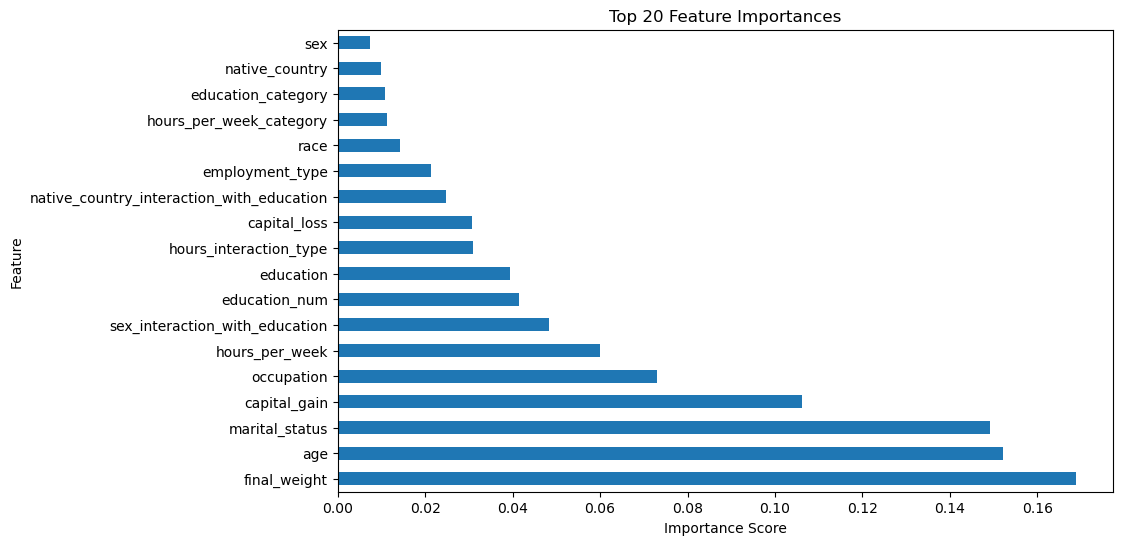

In [19]:
import matplotlib.pyplot as plt

# Choose the number of top features to visualize
top_n = 20

# Select the top N features
top_features = feature_importances.head(top_n)

# Plot the top N features
plt.figure(figsize=(10, 6))
top_features.plot(kind='barh')
plt.title(f'Top {top_n} Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

In [20]:
# Drop multiple columns from the DataFrame
columns_to_drop = ['sex', 'native_country', 'hours_per_week_category', 'education_category', 'employment_type', 'education']
df = df.drop(columns=columns_to_drop)

In [21]:
df.dtypes

age                                           int64
final_weight                                  int64
education_num                                 int64
marital_status                               object
occupation                                   object
race                                         object
capital_gain                                  int64
capital_loss                                  int64
hours_per_week                                int64
income_encoded                                int32
sex_interaction_with_education               object
hours_interaction_type                       object
native_country_interaction_with_education    object
dtype: object

In [22]:
import pandas as pd

# Create a new DataFrame to store the target-encoded values
encoded_df = df.copy()

# List of categorical columns to target encode
categorical_columns = ['marital_status', 'occupation', 'race', 'sex_interaction_with_education', 'hours_interaction_type', 'native_country_interaction_with_education']

# Iterate through each categorical column and perform target encoding
for column in categorical_columns:
    encoding_mapping = df.groupby(column)['income_encoded'].mean().to_dict()
    encoded_df[column + '_encoded'] = df[column].map(encoding_mapping)

# Drop multiple columns from the DataFrame
columns_to_drop = ['marital_status', 'occupation', 'race', 'sex_interaction_with_education', 'hours_interaction_type', 'native_country_interaction_with_education']
encoded_df = encoded_df.drop(columns=columns_to_drop)

encoded_df.dtypes

age                                                    int64
final_weight                                           int64
education_num                                          int64
capital_gain                                           int64
capital_loss                                           int64
hours_per_week                                         int64
income_encoded                                         int32
marital_status_encoded                               float64
occupation_encoded                                   float64
race_encoded                                         float64
sex_interaction_with_education_encoded               float64
hours_interaction_type_encoded                       float64
native_country_interaction_with_education_encoded    float64
dtype: object

In [23]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [24]:
#find design matrix for regression model using 'income_encoded' as response variable 
y, X = dmatrices('income_encoded ~ age+final_weight+education_num+capital_gain+capital_loss+hours_per_week+marital_status_encoded+occupation_encoded+race_encoded+sex_interaction_with_education_encoded+hours_interaction_type_encoded+native_country_interaction_with_education_encoded', data=encoded_df, return_type='dataframe')

#create DataFrame to hold VIF values
vif_df = pd.DataFrame()
vif_df['variable'] = X.columns 

#calculate VIF for each predictor variable 
vif_df['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

#view VIF for each predictor variable 
print(vif_df)

                                             variable        VIF
0                                           Intercept  73.012065
1                                                 age   1.187985
2                                        final_weight   1.018648
3                                       education_num   2.582999
4                                        capital_gain   1.039150
5                                        capital_loss   1.019607
6                                      hours_per_week   1.905705
7                              marital_status_encoded   1.378217
8                                  occupation_encoded   1.258945
9                                        race_encoded   1.036889
10             sex_interaction_with_education_encoded   3.271659
11                     hours_interaction_type_encoded   1.984948
12  native_country_interaction_with_education_encoded   4.003418


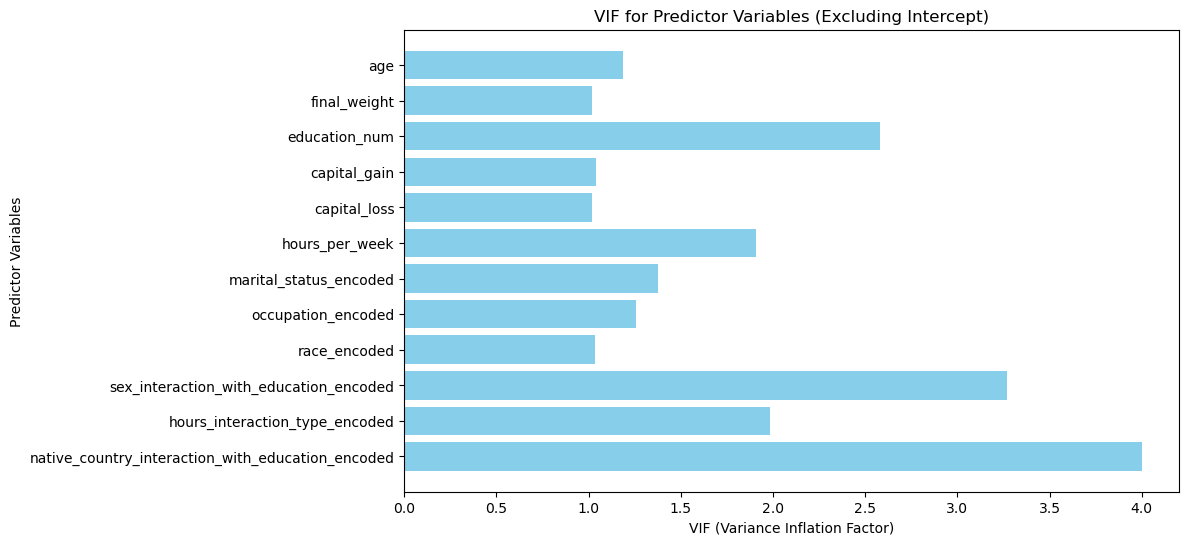

In [25]:
import matplotlib.pyplot as plt


# Filter out the intercept from the DataFrame
vif_df_filtered = vif_df[vif_df['variable'] != 'Intercept']

# Create a bar chart to visualize the VIF values
plt.figure(figsize=(10, 6))
plt.barh(vif_df_filtered['variable'], vif_df_filtered['VIF'], color='skyblue')
plt.xlabel('VIF (Variance Inflation Factor)')
plt.ylabel('Predictor Variables')
plt.title('VIF for Predictor Variables (Excluding Intercept)')
plt.gca().invert_yaxis()  # Invert the y-axis to show the highest VIF at the top
plt.show()

In [26]:
df['income_encoded'].dtype

dtype('int32')

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load your dataset (df)
# Replace 'your_dataset.csv' with the actual file path if loading from a file
# df = pd.read_csv('your_dataset.csv')

# Separate the features (X) and the target variable (y)
X = df.drop(columns=['income_encoded'])  # Features
y = df['income_encoded']  # Target variable

print(y)

0        0
1        0
2        0
3        0
4        0
        ..
32555    0
32556    1
32557    0
32558    0
32559    1
Name: income_encoded, Length: 32560, dtype: int32


In [28]:
# Separate the features (X) and the target variable (y)
X = df.drop(columns=['income_encoded'])  # Features
y = df['income_encoded']  # Target variable

print(y)


0        0
1        0
2        0
3        0
4        0
        ..
32555    0
32556    1
32557    0
32558    0
32559    1
Name: income_encoded, Length: 32560, dtype: int32


C:\Users\5520\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
18 fits failed out of a total of 72.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\5520\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\5520\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\5520\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
ValueErr

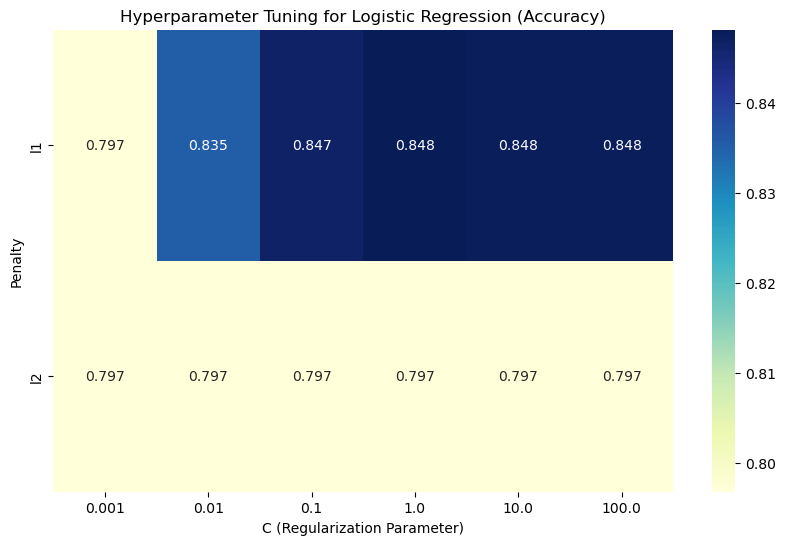

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from category_encoders import TargetEncoder


# Split your dataset into training and test sets
X = df.drop('income_encoded', axis=1)  # Features
y = df['income_encoded']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Specify the categorical columns to be target encoded
categorical_cols = ['marital_status', 'occupation', 'race', 'sex_interaction_with_education', 'hours_interaction_type', 'native_country_interaction_with_education']

# Create a target encoder for the specified categorical columns
encoder = TargetEncoder(cols=categorical_cols)

# Fit the encoder on the training data and transform both training and test data
X_train_encoded = encoder.fit_transform(X_train, y_train)
X_test_encoded = encoder.transform(X_test)

# Define a range of values for the hyperparameters you want to tune
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs'],
}

# Create a Logistic Regression classifier
logistic_regression = LogisticRegression(random_state=42)

# Create a GridSearchCV object with the classifier and hyperparameters
grid_search = GridSearchCV(estimator=logistic_regression, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)

# Fit the GridSearchCV to the training data (including encoding)
grid_search.fit(X_train_encoded, y_train)

# Extract the results of the grid search
results = pd.DataFrame(grid_search.cv_results_)

# Pivot the results to create a heatmap with aggregation (mean accuracy)
heatmap_data = results.pivot_table(index='param_penalty', columns='param_C', values='mean_test_score', aggfunc='mean')

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='.3f', cbar=True)
plt.title('Hyperparameter Tuning for Logistic Regression (Accuracy)')
plt.xlabel('C (Regularization Parameter)')
plt.ylabel('Penalty')
plt.show()

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from category_encoders import TargetEncoder


# Split your dataset into training and test sets
X = df.drop('income_encoded', axis=1)  # Features
y = df['income_encoded']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Specify the categorical columns to be target encoded
categorical_cols = ['marital_status', 'occupation', 'race', 'sex_interaction_with_education', 'hours_interaction_type', 'native_country_interaction_with_education']

# Create a target encoder for the specified categorical columns
encoder = TargetEncoder(cols=categorical_cols)

# Fit the encoder on the training data and transform both training and test data
X_train_encoded = encoder.fit_transform(X_train, y_train)
X_test_encoded = encoder.transform(X_test)

# Define a range of values for the hyperparameter you want to tune
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs'],
}

# Create a Logistic Regression classifier
logistic_regression = LogisticRegression(random_state=42)

# Create a GridSearchCV object with the classifier and hyperparameters
grid_search = GridSearchCV(estimator=logistic_regression, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)

# Fit the GridSearchCV to the training data (including encoding)
grid_search.fit(X_train_encoded, y_train)

# Get the best Logistic Regression classifier with optimized hyperparameters
best_logistic_regression = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred_lr = best_logistic_regression.predict(X_test_encoded)
accuracy_lr = accuracy_score(y_test, y_pred_lr)

print('Best Logistic Regression Classifier Results (Hyperparameters):')
print(f'Accuracy: {accuracy_lr}')

C:\Users\5520\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
18 fits failed out of a total of 72.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\5520\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\5520\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\5520\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
ValueErr

Best Logistic Regression Classifier Results (Hyperparameters):
Accuracy: 0.8465909090909091


In [ ]:
df.dtypes

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from category_encoders import TargetEncoder

# Split your dataset into training and test sets
X = df.drop('income_encoded', axis=1)  # Features
y = df['income_encoded']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Specify the categorical columns to be target encoded
categorical_cols = ['marital_status', 'occupation', 'race', 'sex_interaction_with_education', 'hours_interaction_type', 'native_country_interaction_with_education']

# Create a target encoder for the specified categorical columns
encoder = TargetEncoder(cols=categorical_cols)

# Fit the encoder on the training data and transform both training and test data
X_train_encoded = encoder.fit_transform(X_train, y_train)
X_test_encoded = encoder.transform(X_test)

# Define a very small grid of hyperparameters to search through
param_grid = {
    'n_estimators': [100],
    'max_depth': [None],
    'min_samples_split': [2],
    'min_samples_leaf': [1],
    'max_features': ['auto'],
}

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Create a GridSearchCV object with the classifier and hyperparameters
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)

# Fit the GridSearchCV to the training data (including encoding)
grid_search.fit(X_train_encoded, y_train)

# Get the best Random Forest classifier with optimized hyperparameters
best_rf_classifier = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred_rf = best_rf_classifier.predict(X_test_encoded)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)
confusion_mat_rf = confusion_matrix(y_test, y_pred_rf)

# Print the results for the best Random Forest Classifier
print('Best Random Forest Classifier Results:')
print(f'Accuracy: {accuracy_rf}')
print('Classification Report:')
print(classification_rep_rf)
print('Confusion Matrix:')
print(confusion_mat_rf)


Best Random Forest Classifier Results:
Accuracy: 0.8525798525798526
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      4912
           1       0.73      0.63      0.68      1600

    accuracy                           0.85      6512
   macro avg       0.81      0.78      0.79      6512
weighted avg       0.85      0.85      0.85      6512

Confusion Matrix:
[[4545  367]
 [ 593 1007]]


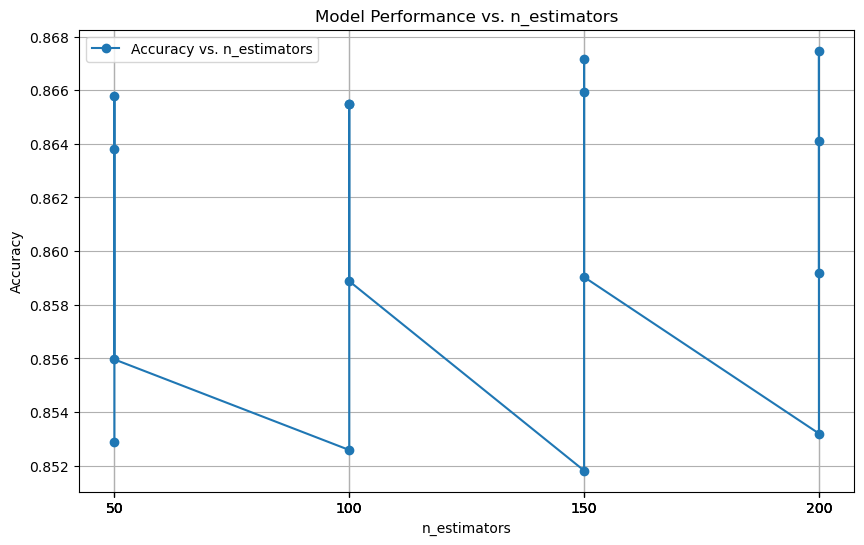

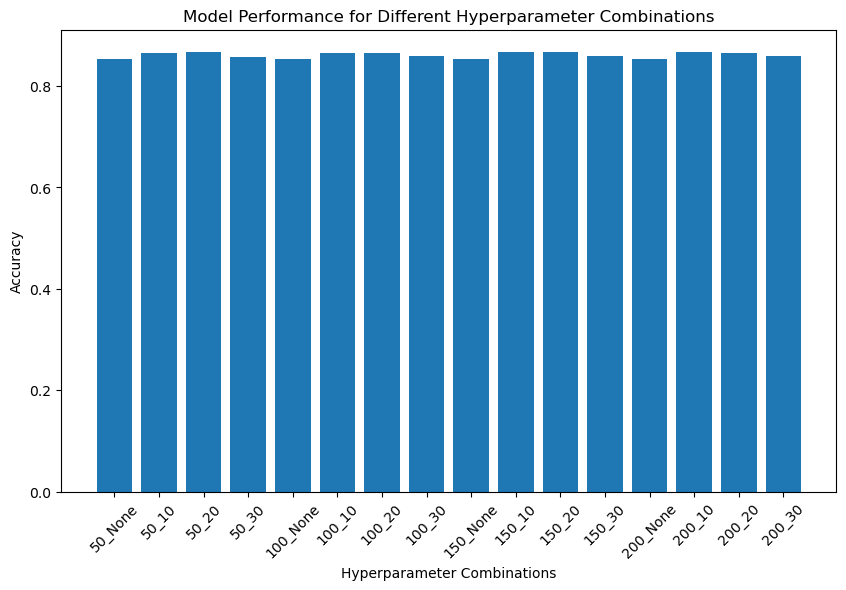

In [37]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from category_encoders import TargetEncoder


# Split your dataset into training and test sets
X = df.drop('income_encoded', axis=1)  # Features
y = df['income_encoded']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Specify the categorical columns to be target encoded
categorical_cols = ['marital_status', 'occupation', 'race', 'sex_interaction_with_education', 'hours_interaction_type', 'native_country_interaction_with_education']

# Create a target encoder for the specified categorical columns
encoder = TargetEncoder(cols=categorical_cols)

# Fit the encoder on the training data and transform both training and test data
X_train_encoded = encoder.fit_transform(X_train, y_train)
X_test_encoded = encoder.transform(X_test)

# Define a range of values for the hyperparameter you want to tune
n_estimators_values = [50, 100, 150, 200]
max_depth_values = [None, 10, 20, 30]

# Create lists to store the performance scores for each combination of hyperparameters
accuracy_scores = []

for n_estimators in n_estimators_values:
    for max_depth in max_depth_values:
        # Create a Random Forest classifier with the current hyperparameters
        rf_classifier = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
        
        # Train the classifier on the encoded training data
        rf_classifier.fit(X_train_encoded, y_train)
        
        # Predict on the test set
        y_pred_rf = rf_classifier.predict(X_test_encoded)
        
        # Calculate the accuracy score and store it
        accuracy = accuracy_score(y_test, y_pred_rf)
        accuracy_scores.append((n_estimators, max_depth, accuracy))

# Extract the hyperparameter values and corresponding accuracy scores
n_estimators_values = [score[0] for score in accuracy_scores]
max_depth_values = [score[1] for score in accuracy_scores]
accuracy_scores = [score[2] for score in accuracy_scores]

# Create a line plot to visualize the performance
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_values, accuracy_scores, marker='o', label='Accuracy vs. n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.title('Model Performance vs. n_estimators')
plt.xticks(n_estimators_values)
plt.legend()
plt.grid(True)
plt.show()

# Create a bar chart to visualize the performance
plt.figure(figsize=(10, 6))
plt.bar(range(len(accuracy_scores)), accuracy_scores, tick_label=[f'{n}_{max_d}' for n, max_d in zip(n_estimators_values, max_depth_values)])
plt.xlabel('Hyperparameter Combinations')
plt.ylabel('Accuracy')
plt.title('Model Performance for Different Hyperparameter Combinations')
plt.xticks(rotation=45)
plt.show()

In [38]:
# Split your dataset into training and test sets
X = df.drop('income_encoded', axis=1)  # Features
y = df['income_encoded']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Specify the categorical columns to be target encoded
categorical_cols = ['marital_status', 'occupation', 'race', 'sex_interaction_with_education', 'hours_interaction_type', 'native_country_interaction_with_education']

# Create a target encoder for the specified categorical columns
encoder = TargetEncoder(cols=categorical_cols)

# Fit the encoder on the training data and transform both training and test data
X_train_encoded = encoder.fit_transform(X_train, y_train)
X_test_encoded = encoder.transform(X_test)

# Define a very small grid of hyperparameters to search through
param_grid = {
    'n_estimators': [200],
    'max_depth': [20],
    'min_samples_split': [2],
    'min_samples_leaf': [1],
    'max_features': ['auto'],
}

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Create a GridSearchCV object with the classifier and hyperparameters
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)

# Fit the GridSearchCV to the training data (including encoding)
grid_search.fit(X_train_encoded, y_train)

# Get the best Random Forest classifier with optimized hyperparameters
best_rf_classifier = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred_rf = best_rf_classifier.predict(X_test_encoded)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)
confusion_mat_rf = confusion_matrix(y_test, y_pred_rf)

# Print the results for the best Random Forest Classifier
print('Best Random Forest Classifier Results:')
print(f'Accuracy: {accuracy_rf}')
print('Classification Report:')
print(classification_rep_rf)
print('Confusion Matrix:')
print(confusion_mat_rf)

Best Random Forest Classifier Results:
Accuracy: 0.8640970515970516
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      4912
           1       0.77      0.64      0.70      1600

    accuracy                           0.86      6512
   macro avg       0.83      0.79      0.81      6512
weighted avg       0.86      0.86      0.86      6512

Confusion Matrix:
[[4596  316]
 [ 569 1031]]


In [45]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# List of columns suspected to have linear relationships
columns_to_correlate = ['education_num', 'age', 'capital_gain', 'capital_loss', 'hours_per_week']  # Add other columns as needed

# Calculate correlation coefficients for each feature
correlation_results = {}

for column in columns_to_correlate:
    correlation_coefficient = df['income_encoded'].corr(df[column])
    correlation_results[column] = correlation_coefficient

# Display correlation coefficients
correlation_df = pd.DataFrame.from_dict(correlation_results, orient='index', columns=['Correlation with Income'])
print(correlation_df)


                Correlation with Income
education_num                  0.335182
age                            0.234039
capital_gain                   0.223333
capital_loss                   0.150523
hours_per_week                 0.229690


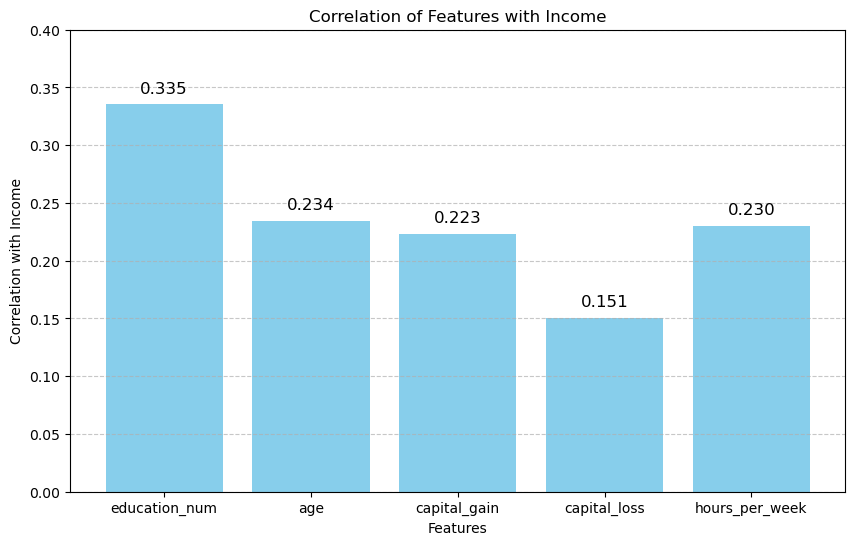

In [46]:
# Data
features = ['education_num', 'age', 'capital_gain', 'capital_loss', 'hours_per_week']
correlation_coefficients = [0.335182, 0.234039, 0.223333, 0.150523, 0.229690]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(features, correlation_coefficients, color='skyblue')
plt.xlabel('Features')
plt.ylabel('Correlation with Income')
plt.title('Correlation of Features with Income')
plt.ylim(0, 0.4)  # Adjust the y-axis limit for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the correlation values on top of the bars
for i, val in enumerate(correlation_coefficients):
    plt.text(i, val + 0.01, f'{val:.3f}', horizontalalignment='center', fontsize=12)

plt.show()

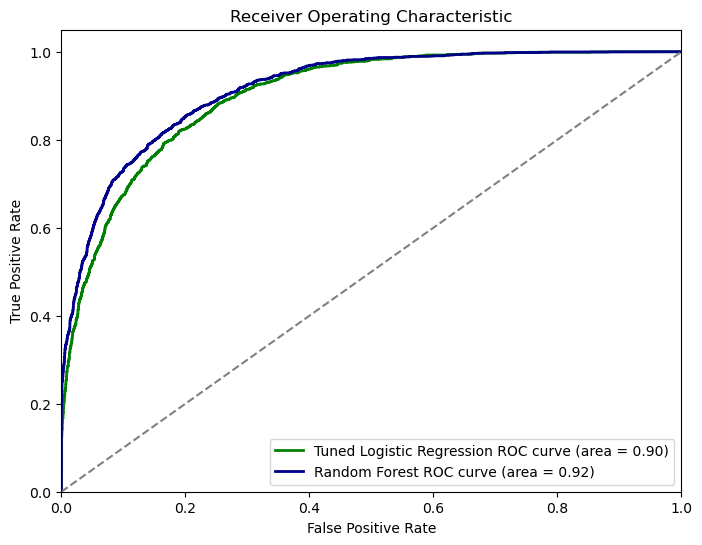

Tuned Logistic Regression Classifier Results:
Accuracy: 0.847051597051597
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      4912
           1       0.74      0.59      0.65      1600

    accuracy                           0.85      6512
   macro avg       0.80      0.76      0.78      6512
weighted avg       0.84      0.85      0.84      6512

Confusion Matrix:
[[4572  340]
 [ 656  944]]


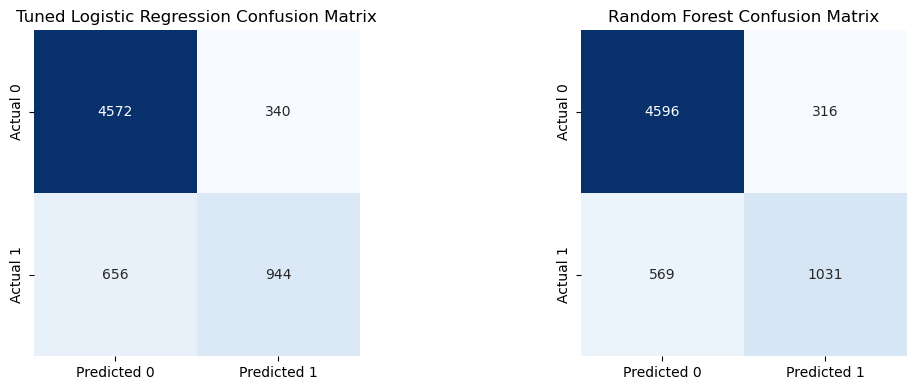

Random Forest Classifier Results:
Accuracy: 0.8640970515970516
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      4912
           1       0.77      0.64      0.70      1600

    accuracy                           0.86      6512
   macro avg       0.83      0.79      0.81      6512
weighted avg       0.86      0.86      0.86      6512

Confusion Matrix:
[[4596  316]
 [ 569 1031]]


In [50]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Fit the Logistic Regression classifier with the updated hyperparameters and get probability scores
lr_classifier_tuned = LogisticRegression(penalty='l1', C=10, solver='liblinear', random_state=42)
lr_classifier_tuned.fit(X_train_encoded, y_train)
y_prob_lr_tuned = lr_classifier_tuned.predict_proba(X_test_encoded)[:, 1]
y_pred_lr_tuned = lr_classifier_tuned.predict(X_test_encoded)  # Predict class labels

# Fit the Random Forest classifier and get probability scores
rf_classifier = RandomForestClassifier(n_estimators=200, max_depth=20, random_state=42)
rf_classifier.fit(X_train_encoded, y_train)
y_prob_rf = rf_classifier.predict_proba(X_test_encoded)[:, 1]
y_pred_rf = rf_classifier.predict(X_test_encoded)  # Predict class labels

# Compute ROC curve and ROC area for Logistic Regression with updated hyperparameters
fpr_lr_tuned, tpr_lr_tuned, _ = roc_curve(y_test, y_prob_lr_tuned)
roc_auc_lr_tuned = auc(fpr_lr_tuned, tpr_lr_tuned)

# Compute ROC curve and ROC area for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC curves for both classifiers
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr_tuned, tpr_lr_tuned, color='green', lw=2, label='Tuned Logistic Regression ROC curve (area = %0.2f)' % roc_auc_lr_tuned)
plt.plot(fpr_rf, tpr_rf, color='darkblue', lw=2, label='Random Forest ROC curve (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Evaluate Logistic Regression Classifier with updated hyperparameters
accuracy_lr_tuned = accuracy_score(y_test, y_pred_lr_tuned)
classification_rep_lr_tuned = classification_report(y_test, y_pred_lr_tuned)
confusion_mat_lr_tuned = confusion_matrix(y_test, y_pred_lr_tuned)

# Print the results for Tuned Logistic Regression Classifier
print('Tuned Logistic Regression Classifier Results:')
print(f'Accuracy: {accuracy_lr_tuned}')
print('Classification Report:')
print(classification_rep_lr_tuned)
print('Confusion Matrix:')
print(confusion_mat_lr_tuned)

# Evaluate Random Forest Classifier
accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)
confusion_mat_rf = confusion_matrix(y_test, y_pred_rf)

# Confusion Matrix Heatmap
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.heatmap(confusion_mat_lr_tuned, annot=True, fmt="d", cmap="Blues", cbar=False, square=True,
            xticklabels=["Predicted 0", "Predicted 1"], yticklabels=["Actual 0", "Actual 1"])
plt.title("Tuned Logistic Regression Confusion Matrix")

plt.subplot(1, 2, 2)
sns.heatmap(confusion_mat_rf, annot=True, fmt="d", cmap="Blues", cbar=False, square=True,
            xticklabels=["Predicted 0", "Predicted 1"], yticklabels=["Actual 0", "Actual 1"])
plt.title("Random Forest Confusion Matrix")

plt.tight_layout()
plt.show()

# Print the results for Random Forest Classifier
print('Random Forest Classifier Results:')
print(f'Accuracy: {accuracy_rf}')
print('Classification Report:')
print(classification_rep_rf)
print('Confusion Matrix:')
print(confusion_mat_rf)

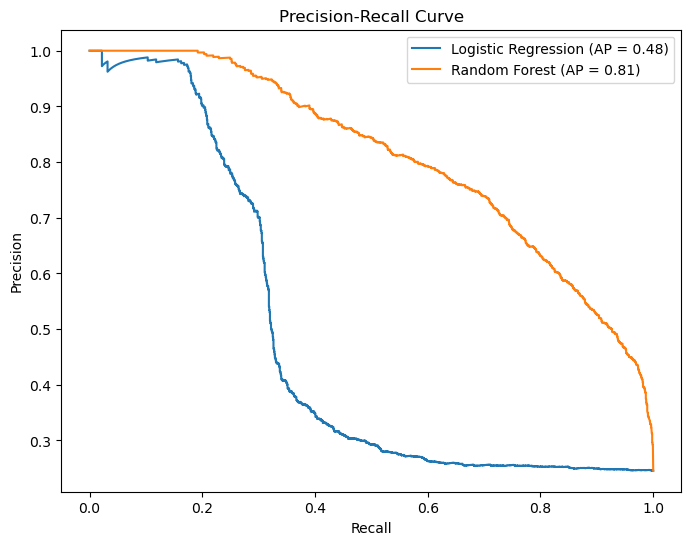

In [51]:
# Precision-Recall Curve
plt.figure(figsize=(8, 6))
precision_lr, recall_lr, _ = precision_recall_curve(y_test, y_prob_lr)
avg_precision_lr = average_precision_score(y_test, y_prob_lr)
plt.plot(recall_lr, precision_lr, label=f'Logistic Regression (AP = {avg_precision_lr:.2f})')

precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_prob_rf)
avg_precision_rf = average_precision_score(y_test, y_prob_rf)
plt.plot(recall_rf, precision_rf, label=f'Random Forest (AP = {avg_precision_rf:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()